<a href="https://colab.research.google.com/github/MainaLD/21_Segmentation_lesions_pulmonaires/blob/main/U-NET_Segmentation_lesions_pulmonaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation des lésions pulmonaires




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm


## Partie 1 : Base de données

La DataSet se trouve sur : https://drive.google.com/file/d/1TVQ5a-IOdn95eAAT8QLVA45s8WBAW1re/view?usp=sharing

Par la suite, il faut développer les étapes suivantes :

* Charger les images. 
* Penser à redimensionner les images selon le modèle souhaité. 
* Splitter les données en données d’apprentissage, validation et test. 
* Visualiser les images de CT et sa vérité terrain (segmentation manuelle). 
* Appliquer la data augmentation.

In [1]:
# Download data
#!unzip /content/CT_Scan_Lesion_Segmentation.zip -d /content/Untitled Folder

In [25]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/21_Segmentation_U-NET/CT_Scan_Lesion_Segmentation.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/21_Segmentation_U-NET/Data")

In [4]:
ls /content/drive/MyDrive/21_Segmentation_U-NET/Data

frames/  masks/


In [3]:
os.chdir("/content/drive/MyDrive/21_Segmentation_U-NET/Data")
path = os.getcwd()
labels = os.listdir(path) 
print(labels) 

['frames', 'masks']


In [4]:
ls

frames/  masks/


In [5]:
dir_frames=path+"/frames/"
print(dir_frames)
dir_mask=path+"/masks/"
print(dir_mask)

/content/drive/MyDrive/21_Segmentation_U-NET/Data/frames/
/content/drive/MyDrive/21_Segmentation_U-NET/Data/masks/


In [6]:
width=240
height=240
channels=3

tab_img=[]
tab_mask=[]

for n, i in tqdm(enumerate(os.listdir(dir_frames)), total=len(os.listdir(dir_frames))):
    tab_img.append(cv2.resize(cv2.imread(dir_frames+i), (width, height))/255)

    img_mask=cv2.resize(cv2.imread(dir_mask+i), (width, height))[:,:,2]
    img_mask_result=np.zeros(shape=(height, width, 1), dtype=np.float32)
    img_mask_result[:,:,0][img_mask==255]=1.
    tab_mask.append(img_mask_result)

100%|██████████| 2729/2729 [14:55<00:00,  3.05it/s]


In [40]:
print("tab_img =",len(tab_img))
print("tab_mask =",len(tab_mask))

tab_img = 2729
tab_mask = 2729


In [ ]:
len(tab_mask)

In [42]:
np.max(tab_mask)

1.0

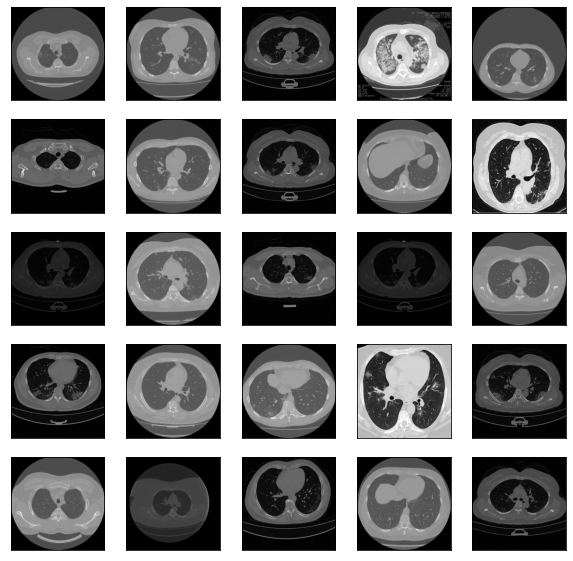

In [34]:
#import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    nbr = np.random.randint(0, 1524, [1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tab_img[nbr[0]])
    #plt.xlabel(tab_mask[nbr[0]])
plt.show()


In [ ]:
# Transformer les listes en matrice numpy, et standardisé les images
X = np.array(images)/255.0
print(X.shape)

y = np.array(label)
print('************')
print(y.shape)

## Partie 2 : Transfer Learning

*   Cette deuxième partie est réservée pour préparer le modèle de segmentation et d’appliquer un Transfer Learning sur votre architecture.

*   Calculer le F1-Score sur la base de test.